In [1]:
import numpy as np

`rotation`
---

In [19]:
def rotation(point, degree = None, theta = None):

    if theta:
        rotate = theta
    else:
        rotate = np.radians(degree)

    # R = np.array([[np.cos(rotate), -np.sin(rotate), 0],
    #               [np.sin(rotate), np.cos(rotate), 0],
    #               [0, 0, 1]], dtype = np.float32)
    R = np.array([[np.cos(rotate), -np.sin(rotate)],
                  [np.sin(rotate), np.cos(rotate)]], dtype = np.float32)
    return R @ point


In [24]:
p = np.array([[8.0],
              [0.0]])

print(rotation(p, theta = 1.98))

[[-3.18303108]
 [ 7.33950377]]


`translation`
---

In [6]:
def translation(p, origin):
    return p + origin

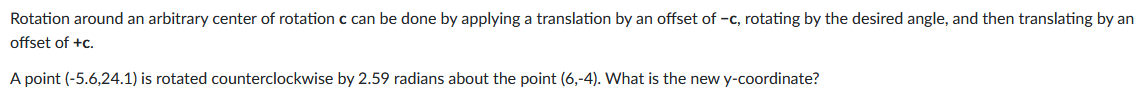

In [23]:
import numpy as np

# center of rotation
c = np.array([6, -4]) 
point = np.array([-5.6, 24.1])

# Step 1: Translate the point to the origin
translated_point = point - c

# Step 2: Apply the rotation matrix
rotated_point = rotation(translated_point, theta = 2.59)

# Step 3: Translate the point back
final_point = rotated_point + c

# Output the new y-coordinate
final_y = final_point[1]
final_y


-34.011431598663336

In [ ]:
def compose(frame, image, transformation):
    
    width, height = frame.size
    
    #Invert matrix for compose function, grab values for Affine Transform
    t = np.linalg.inv(transformation)
    a=t[0,0]; b=t[0,1]; c=t[0,2]; d=t[1,0]; e=t[1,1]; f=t[1,2]
    
    image = image.transform((width,height), Image.AFFINE,(a,b,c,d,e,f), Image.BICUBIC)

    #Make mask from image's location
    im = np.sum(np.asarray(image), -1)
    vals = 255.0*( im > 0)
    mask = Image.fromarray(vals).convert("1")

    #Composite images together
    result = Image.composite(image,frame,mask)

    return result

In [ ]:
def compose(frame, images, transformations):
    """
    Composite multiple images onto the frame.
    
    Args:
        frame: The background frame (PIL Image).
        images: A list of images (PIL Images) to composite onto the frame.
        transformations: A list of 3x3 transformation matrices (NumPy arrays) for each image.

    Returns:
        result: The final composed image (PIL Image).
    """
    width, height = frame.size
    
    # Iterate over all images and corresponding transformations
    for image, transformation in zip(images, transformations):
        # Invert matrix for affine transform
        t = np.linalg.inv(transformation)
        a = t[0,0]; b = t[0,1]; c = t[0,2]
        d = t[1,0]; e = t[1,1]; f = t[1,2]
        
        # Apply the affine transformation to the image
        transformed_image = image.transform((width, height), Image.AFFINE, (a, b, c, d, e, f), Image.BICUBIC)
        
        # Make mask from the transformed image's location
        im = np.sum(np.asarray(transformed_image), -1)
        vals = 255.0 * (im > 0)
        mask = Image.fromarray(vals).convert("1")
        
        # Composite the transformed image onto the frame
        frame = Image.composite(transformed_image, frame, mask)
    
    return frame